# Data Mining
### Topic - Aggregation
Dataset used:- Predict Test Scores of Students (https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students)



Link to project report:- https://docs.google.com/document/d/1JY18T2ELKLMgvaaPqWLdMwQJHe4kudvDq-HUjUL3asA/edit#heading=h.qd67i7g3zjnl

We have explored the data by preprocessing using aggregation and visualised in the form of charts and plots. We have further created a linear regression model that is capable of predicting the post-test scores of students if pre-test scores are known.

In [ ]:
#importing necessary libraries for preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/test_scores.csv')

# Pre-Processing

We have imported the necessary libraries and read the used dataset using pandas. Dataframe is a data structure in pandas that stores the data in the form of rows and columns.

*    df.head() gives us the first 5 rows of the dataframe.
*   df.describe() gives the overview of the numerical columns of the dataset.
*   df.isnull().sum() gives the number of null values in each column.
*   df.dtypes gives the dataypes of each column. Object represents categorical data and float64 represents continuous data(floating point).





In [ ]:
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [ ]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [ ]:
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object



---










### We will be performing operations on various columns.
1. School - We have calculated the count of students studying in each school using groupby, average score of them in pretest for each school and also visualised the same.






In [ ]:
df.groupby(['school' ] ).count()['school_setting']

school
ANKYI     41
CCAAW    109
CIMBB     74
CUQAM    107
DNQDD    122
FBUMG     46
GJJHK    118
GOKXL     64
GOOBU    158
IDGFP     94
KFZMY     52
KZKKE    111
LAYPA     57
OJOBU     81
QOQTS    149
UAGPU     87
UKPGS    128
UUUQX     84
VHDHF     51
VKWQH    100
VVTVA    114
ZMNYA     69
ZOWMK    117
Name: school_setting, dtype: int64

In [ ]:
maximum = (df.groupby(['school' ] ).count()['school_setting']).max()
minimum= (df.groupby(['school' ] ).count()['school_setting']).min()

In [ ]:
a=dict(df.groupby(['school' ] ).count()['school_setting'])
a

list(a.keys())
for i in list(a.keys()):
   if df.groupby(['school' ] ).count()['school_setting'][i]==maximum:
      print("The maximum no of students are in ",i, "school having :",maximum,"students")
      break
for i in list(a.keys()):
   if df.groupby(['school' ] ).count()['school_setting'][i]==minimum:
      print("The minimum no of students are in ",i,"school having :",minimum,"students")
      break

The maximum no of students are in  GOOBU school having : 158 students
The minimum no of students are in  ANKYI school having : 41 students


In [ ]:
z=dict(df.groupby(['school' ] ).count()['school_setting'])
z1=list(z.keys())
z2=list(z.values())

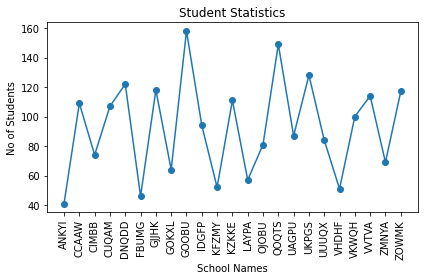

In [ ]:
plt.plot(z1, z2, marker='o')
plt.xticks(rotation="vertical")
plt.xlabel("School Names")
plt.ylabel("No of Students")
plt.title("Student Statistics")
plt.tight_layout()

The plot supports our inference of the schools having maximum and minimum count of students. It can be clearly seen that "GOOBU" has the greatest number of students, and "ANKYI" has the least number of students.

In [ ]:
df.groupby(['school' ] )['pretest'].mean()

school
ANKYI    61.341463
CCAAW    64.623853
CIMBB    65.067568
CUQAM    53.925234
DNQDD    54.327869
FBUMG    62.891304
GJJHK    53.194915
GOKXL    50.796875
GOOBU    38.196203
IDGFP    75.202128
KFZMY    41.865385
KZKKE    37.261261
LAYPA    62.035088
OJOBU    56.197531
QOQTS    52.597315
UAGPU    62.390805
UKPGS    78.453125
UUUQX    67.309524
VHDHF    52.666667
VKWQH    52.060000
VVTVA    36.008772
ZMNYA    68.130435
ZOWMK    41.572650
Name: pretest, dtype: float64

In [ ]:
w=dict(df.groupby(['school' ] )['pretest'].mean())
w1=list(w.keys())
w2=list(w.values())

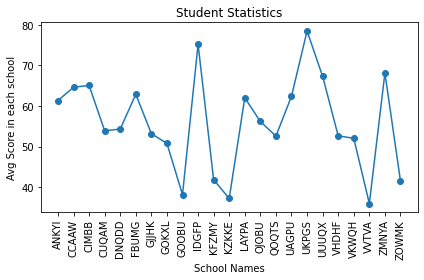

In [ ]:
plt.plot(w1, w2, marker='o')
plt.xticks(rotation="vertical")
plt.xlabel("School Names")
plt.ylabel("Avg Score in each school")
plt.title("Student Statistics")
plt.tight_layout( )

The graph shows average scores of students in each school. We can infer that the average score of students in pretest is maximum in "UKPGS" and minimum in "WTVA".

2. **School Setting** - We have calculated the count of students studying in different school settings using groupby, average score of them in pretest for each school and also visualised the same.



In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.groupby(['school_setting' ] ).count()

,school,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
school_setting,,,,,,,,,,
Rural,510,510,510,510,510,510,510,510,510,510
Suburban,717,717,717,717,717,717,717,717,717,717
Urban,906,906,906,906,906,906,906,906,906,906


In [ ]:
print("The no of students studying in different locations are: ")
df.groupby(['school_setting' ] ).count()['school']

The no of students studying in different locations are: 


school_setting
Rural       510
Suburban    717
Urban       906
Name: school, dtype: int64

In [ ]:
x1=list(dict(df.groupby(['school_setting' ] ).count()['school']).keys())
y1=list(dict(df.groupby(['school_setting' ] ).count()['school']).values())

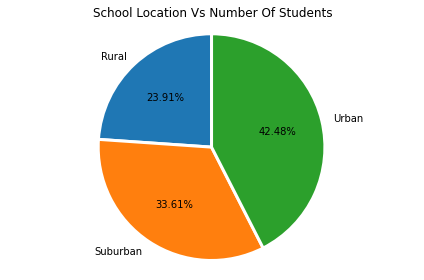

In [ ]:
plt.pie(y1,labels=x1,startangle=90, shadow=False, wedgeprops={"edgecolor":"1",'linewidth': 3, 'antialiased': True},autopct='%1.2f%%')
plt.title("School Location Vs Number Of Students")
plt.axis('equal')
plt.tight_layout()
plt.show() 

We can infer that the largest section of students (42.8%) study in schools in urban areas.

In [ ]:
#relation b/w  school  and the pretest score
print("The average scores of different students in different locations are :")
df.groupby(['school_setting' ] )['pretest'].mean()

The average scores of different students in different locations are :


school_setting
Rural       51.490196
Suburban    63.841004
Urban       49.875276
Name: pretest, dtype: float64

In [ ]:
g=list(dict(df.groupby(['school_setting' ] )['pretest'].mean()).keys())
g1=list(dict(df.groupby(['school_setting' ] )['pretest'].mean()).values())

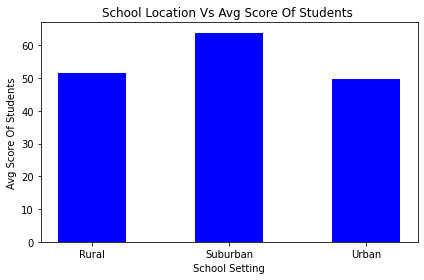

In [ ]:
plt.bar(g, g1, color='b',width=0.5)
plt.plot()
plt.xlabel("School Setting")
plt.ylabel("Avg Score Of Students")
plt.title("School Location Vs Avg Score Of Students ")
plt.tight_layout()
plt.show()

The chart represents that students studying in sub-urban areas are scoring the best, though maximum number of students study in Urban areas.

3. **School Type** - We have calculated the count of students studying in different school types using groupby, average score of them in pretest for each school and also visualised the same.

In [ ]:
#relation b/w  school types and the pretest score
df.groupby(['school_type' ] ).count()['school']

school_type
Non-public     551
Public        1582
Name: school, dtype: int64

In [ ]:
print("The average scores of students in public and non-public schools are:")
df.groupby(['school_type' ] )['pretest'].mean()

The average scores of students in public and non-public schools are:


school_type
Non-public    63.254083
Public        52.065740
Name: pretest, dtype: float64

In [ ]:
z3=list(dict(df.groupby(['school_type' ] )['pretest'].mean()).keys())
z4=list(dict(df.groupby(['school_type' ] )['pretest'].mean()).values())

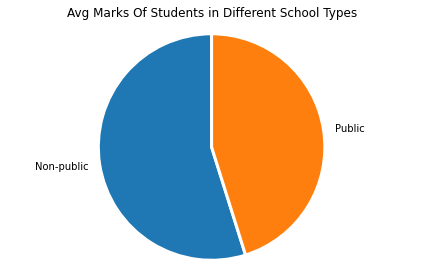

In [ ]:
plt.pie(z4,labels=z3,startangle=90, shadow=False, wedgeprops={"edgecolor":"1",'linewidth': 3, 'antialiased': True})
plt.title("Avg Marks Of Students in Different School Types")
plt.axis('equal')
plt.tight_layout()
plt.show() 

On visualising the average scores of students studying in different types of schools, we can infer that students studying in Non-public sector score better in pretests than the ones in Public sectors.

4. **Teaching method** - We have calculated the count of students undergoing different teaching methods and analysed its impact on students' peformance.

In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.groupby(['teaching_method' ] )['pretest'].count()

teaching_method
Experimental     760
Standard        1373
Name: pretest, dtype: int64

In [ ]:
print("We can see the average scores of students for different teachniques of teaching ")
df.groupby(['teaching_method' ] )['pretest'].mean()

We can see the average scores of students for different teachniques of teaching 


teaching_method
Experimental    57.055263
Standard        53.793882
Name: pretest, dtype: float64

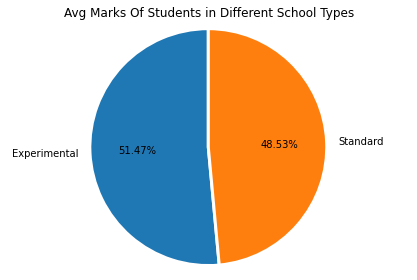

In [ ]:
plt.pie([57.055263,53.793882],labels=['Experimental','Standard'],startangle=90, shadow=False, wedgeprops={"edgecolor":"1",'linewidth': 3, 'antialiased': True},autopct='%1.2f%%')
plt.title("Avg Marks Of Students in Different School Types")
plt.axis('equal')
plt.tight_layout()
plt.show() 

Conventional(Standard) methods of teaching have proved to be slightly less impactful on students when compared to the Experimental methods of teaching.

5. **Classroom** - We have calculated the count, minimum count and average count of students in various classrooms using groupby and average score of them in pretest for each school.

In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.groupby(['classroom' ] )['n_student'].count()

classroom
05H    22
08N    21
0N7    28
18K    31
197    14
       ..
YTB    30
YUC    21
ZBH    30
ZDT    27
ZNS    21
Name: n_student, Length: 97, dtype: int64

In [ ]:
df.groupby(['classroom' ] )['n_student'].count().min()

14

In [ ]:
df.groupby(['classroom' ] )['n_student'].count().mean()

21.989690721649485

In [ ]:
df.groupby(['classroom' ] )['pretest'].mean()

classroom
05H    72.954545
08N    83.761905
0N7    44.107143
18K    46.451613
197    62.285714
         ...    
YTB    32.533333
YUC    45.857143
ZBH    40.466667
ZDT    53.703704
ZNS    59.285714
Name: pretest, Length: 97, dtype: float64

6. **Gender** - We have calculated the count of male and female students in each school and visualised the same using stacked bar chart.

In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.groupby(['gender' ] )['school'].count()

gender
Female    1056
Male      1077
Name: school, dtype: int64

In [ ]:
df.groupby(['gender' ] )['pretest'].mean()

gender
Female    54.873106
Male      55.037140
Name: pretest, dtype: float64

In [ ]:
data = pd.read_csv("/content/test_scores.csv", index_col ="gender")
f=data.loc["Female"]
m=data.loc["Male"]
data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,lunch,pretest,posttest
gender,,,,,,,,,,
Female,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Does not qualify,62.0,72.0
Female,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Does not qualify,66.0,79.0
Male,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Does not qualify,64.0,76.0
Female,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Does not qualify,61.0,77.0
Male,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...
Female,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Does not qualify,39.0,55.0
Female,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Qualifies for reduced/free lunch,38.0,46.0
Female,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Qualifies for reduced/free lunch,45.0,51.0


In [ ]:
fem=list(dict(f.groupby(['school'])['school_setting'].count()).values())
mal=list(dict(m.groupby(['school'])['school_setting'].count()).values())
print(fem)
print(mal)

[20, 69, 37, 43, 53, 19, 64, 26, 79, 43, 28, 52, 33, 27, 76, 44, 67, 41, 24, 49, 63, 31, 68]
[21, 40, 37, 64, 69, 27, 54, 38, 79, 51, 24, 59, 24, 54, 73, 43, 61, 43, 27, 51, 51, 38, 49]


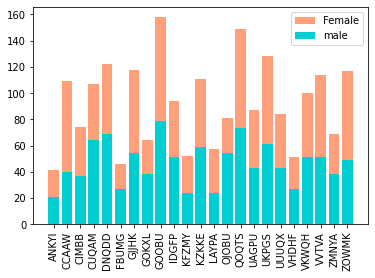

In [ ]:
# plot bars in stack manner
plt.bar(z1, fem,bottom=mal,label='Female',color='lightsalmon')
plt.bar(z1, mal,label='male',color='darkturquoise')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

The graph represents the distribution of girls and boys in every school.

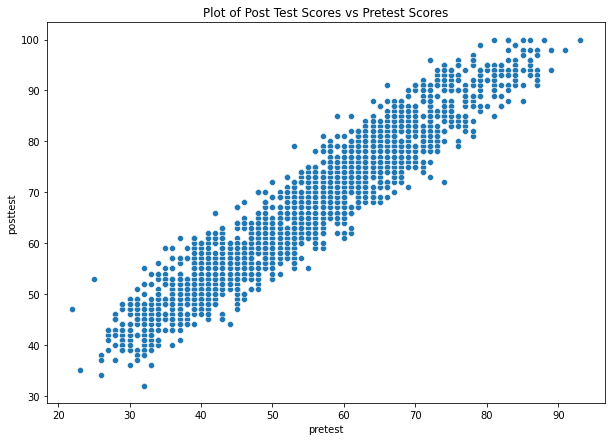

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Plot of Post Test Scores vs Pretest Scores')
sns.scatterplot(data=df, x='pretest', y='posttest')

The scatterplot shows  the relationship between the pretest and posttest scores, we can see that they have a positive correlation . 

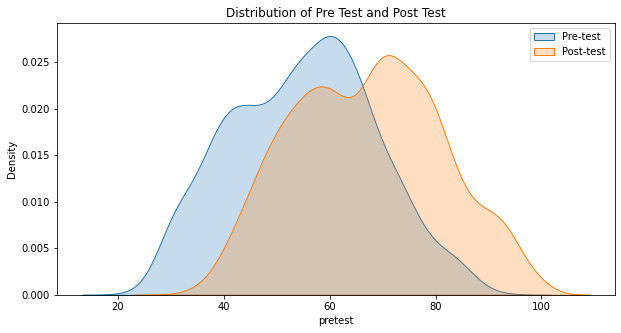

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df['pretest'], shade=True, label='Pre-test')
sns.kdeplot(data=df['posttest'], shade=True, label='Post-test')
plt.title('Distribution of Pre Test and Post Test')
plt.legend()
plt.show()

The pretest and the posttest scores seem to be similar and positively correlated, as the density graph shifts to the right. The scores of students tend to increase in the posttest.

In [ ]:
print( "variance of pretest: ",df['pretest'].var())
print("variance of posttest: ",df['posttest'].var())
print("standard deviation of pretest scores: ",df['pretest'].std())
print("standard deviation of posttest scores: ",df['posttest'].std())
print("mean of pretest: ",df['pretest'].mean())
print("mean of posttest: ",df['posttest'].mean())

variance of pretest:  183.9577192672281
variance of posttest:  195.6302624970427
standard deviation of pretest scores:  13.563101388223421
standard deviation of posttest scores:  13.98678885581114
mean of pretest:  54.95593061415846
mean of posttest:  67.10220346929208


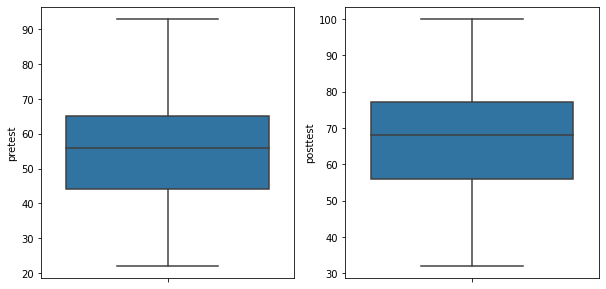

In [ ]:
fig , ax= plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot( y='pretest', data=df, ax=ax[0])
sns.boxplot( y='posttest', data=df, ax=ax[1])

We can see that the scores of the posttest are comparitively higher than the pretest.




---





##Model

We have used linear regression model to predict the posttest scores of students using the pretest scores. We use **scikitlearn** package for building and training the model.

*   **from sklearn.model_selection import train_test_split**: train_test_split is used to split the data for training and testing by partitioning the dataset in required proportions.

*   **mean_absolute_error , mean_sqaured_Error**: mean_absolute_error and mean_squared_error are used to evaluate the performance of our model. The lesser the error the better our model performs .

*   **from sklearn.linear_model import LinearRegression**: We have imported the linear regression model from sklearn to predict the posttest scores using the pretest scores.

*   **from sklearn.metrics import r2_score**: r2_score (coefficient of determination) is a regression score function. The performance of the model is the best if the r2_Score is 1. The closer it is to 1, the better it performs. The value can be negative, if the model performs arbitrarily worse.  







In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Prepare for model building

# Utility function for evaluating model performance
def eval(y, y_hat):
    MAE = mean_absolute_error(y, y_hat)
    MSE = mean_squared_error(y, y_hat)
    r2 = r2_score(y, y_hat)
    print(f'Mean Abs Error: {MAE:.2f}\nMean Square Error: {MSE:.2f}\nR^2 Score: {r2:.2f}')
    return (MAE, MSE, r2)

x = df[['pretest', 'n_student', 'school_setting', 'school_type', 'teaching_method', 'lunch']]
y = df[['posttest']]

# Encode categorical data
x = pd.get_dummies(x)

The target variable and the other input variables have been separated.

**pd.get_dummies(x):** The pd.get_dummies(x) converts categorical variable into dummy/indicator variables.


The eval() function is a utility function for evaluating model performance. It takes input as posttest actual value and posttest predicted value and evaluates how the model performs. It returns the MAE(Mean Absolute Error), MSE(Mean Squared Error) and r2_score. 


In [ ]:
x

,pretest,n_student,school_setting_Rural,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,62.0,20.0,0,0,1,1,0,0,1,1,0
1,66.0,20.0,0,0,1,1,0,0,1,1,0
2,64.0,20.0,0,0,1,1,0,0,1,1,0
3,61.0,20.0,0,0,1,1,0,0,1,1,0
4,64.0,20.0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2128,39.0,30.0,0,0,1,0,1,0,1,1,0
2129,38.0,30.0,0,0,1,0,1,0,1,0,1
2130,45.0,30.0,0,0,1,0,1,0,1,0,1
2131,46.0,30.0,0,0,1,0,1,0,1,0,1


The data is divided into x_train, x_test, y_train, y_test using the train_test_split. We have used a test size of 0.4, that is 40% of the entire data would be the test data and rest 60% would be used as training data. The random state is set to 0.
The model is called and then fit using the .fit() method by passing x_train and y_train as parameters. Finally the model is evaluated by passing the actual and predicted values of y_test into the eval() function.

In [ ]:
x_simple = x[['pretest']]

x_train, x_test, y_train, y_test = train_test_split(x_simple, y, test_size = 0.4, random_state = 0)
model_linear = LinearRegression()

model_linear.fit(x_train, y_train)
y_predict = model_linear.predict(x_test)

eval(y_test, y_predict)


Mean Abs Error: 3.52
Mean Square Error: 18.96
R^2 Score: 0.90


(3.5207456822490104, 18.963575264769727, 0.9031614408613375)

We can see that we have obtained MAE as 3.52, MSE as 18.96 and R^2 Score is 0.9031. Our model performs slightly well considering the scores obtained.

In [ ]:
model_linear.predict([[60]])

array([[72.13431239]])

Here we have tested our model by giving  an pretest score of 60 and the posttest score obtained by the model is 72